![](pics\task1.jpg)

![](pics\task1_2.jpg)

In [91]:
import numpy as np
from numpy.random import default_rng
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [15]:
dr = default_rng(0)

In [16]:
def rand(a, b, m, n):
    return (b-a) * dr.random((m, n)) + a

def basicDistance(sample1, sample2):
    return np.linalg.norm(sample1 - sample2)

def distance(clast1, clast2):
    return (clast1.d + clast2.d) / 2



In [17]:
def basicDistanceMatrix(samples: np.array):
    prev_distances = np.zeros((len(samples), len(samples)))
    min_value = np.inf
    min_dist_indexes = (-1, -1)
    for i in range(len(samples)):
        for k in range(i + 1):
            prev_distances[i][k] = basicDistance(samples[i], samples[k])
            prev_distances[k][i] = prev_distances[i][k]
            if prev_distances[i][k] < min_value and prev_distances[i][k] != 0:
                min_value = prev_distances[i][k]
                min_dist_indexes = (i, k)
    return prev_distances

def basicDistanceDict(samples: np.array):
    prev_distances = {}
    for i in range(len(samples)):
        for k in range(i + 1):
            prev_distances.update({(i, k): basicDistance(samples[i], samples[k])})
    return prev_distances


In [93]:
def clasterizing(samples: np.array):
    c = []
    samples_amount = len(samples)
    avaliable_indexes = list(range(samples_amount))
    linkage_matrix = np.zeros((samples_amount - 1, 4))
    iter_link_matrix = 0
    for sample in samples:
        c.append(sample)
    distances_dict = basicDistanceDict(samples)
    min_value = np.inf
    min_dist_indexes = (-1, -1)
    while len(c) > 1:
        #choosing min distance
        min_value = np.inf
        for key, val in distances_dict.items():
            if min_value > val and val != 0:
                min_value = val
                min_dist_indexes = key
        print("-------------")
        print("Min value: " + str(min_value) + "\n")
        print("Indexes of clusters: " + str(min_dist_indexes))
        print("General cluster:")
        print(c)
        print()
        print("Matrix of distances: " + str(distances_dict))
        #merging two clasters and insterting to the list
        c.append([c[avaliable_indexes.index(min_dist_indexes[0])], c[avaliable_indexes.index(min_dist_indexes[1])]])
        c.pop(avaliable_indexes.index(min_dist_indexes[0]))
        c.pop(avaliable_indexes.index(min_dist_indexes[1]))
        avaliable_indexes.remove(min_dist_indexes[0])
        avaliable_indexes.remove(min_dist_indexes[1])
        
        #updating linkage matrix
        linkage_matrix[iter_link_matrix][0] = min_dist_indexes[0]
        linkage_matrix[iter_link_matrix][1] = min_dist_indexes[1]
        linkage_matrix[iter_link_matrix][2] = min_value
        
        first_clast_amount = 0
        if min_dist_indexes[0] < samples_amount:
            first_clast_amount = 1
        else:
            first_clast_amount = linkage_matrix[min_dist_indexes[0] - samples_amount][3]
        second_clast_amount = 0
        if min_dist_indexes[1] < samples_amount:
            second_clast_amount = 1
        else:
            second_clast_amount = linkage_matrix[min_dist_indexes[1] - samples_amount][3]
        linkage_matrix[iter_link_matrix][3] = first_clast_amount + second_clast_amount
        print(linkage_matrix)
        
        #inserting distances for new claster
        new_claster_index = samples_amount + iter_link_matrix
        print(avaliable_indexes)
        print(min_dist_indexes[0])
        #avaliable_indexes.remove(min_dist_indexes[0])
        #avaliable_indexes.remove(min_dist_indexes[1])
        for index in avaliable_indexes:
            new_value = distances_dict[(max(index, min_dist_indexes[0]), min(index, min_dist_indexes[0]))]
            new_value += distances_dict[(max(index, min_dist_indexes[1]), min(index, min_dist_indexes[1]))]
            new_value /= 2
            distances_dict.update({(new_claster_index, index): new_value})
            
        #removing old distances
        d = distances_dict.copy()
        for key in distances_dict.keys():
            if new_claster_index in key:
                break
            if min_dist_indexes[0] in key or min_dist_indexes[1] in key:
                del d[key]
        avaliable_indexes.append(new_claster_index)
        distances_dict = d
        iter_link_matrix += 1
    return c, linkage_matrix

    

In [75]:
arr = rand(1, 9, 5, 2)
print(arr)

[[8.32259168 2.01922407]
 [1.58850324 1.56261003]
 [7.95083435 6.07255983]
 [4.97257355 2.30834733]
 [6.3898675  3.5441391 ]]


-------------
Min value: 1.8803998115953706

Indexes of clusters: (4, 3)
General cluster:
[array([8.32259168, 2.01922407]), array([1.58850324, 1.56261003]), array([7.95083435, 6.07255983]), array([4.97257355, 2.30834733]), array([6.3898675, 3.5441391])]

Matrix of distances: {(0, 0): 0.0, (1, 0): 6.749551353918974, (1, 1): 0.0, (2, 0): 4.070348180705983, (2, 1): 7.798647602956427, (2, 2): 0.0, (3, 0): 3.36247137274707, (3, 1): 3.4652641991479225, (3, 2): 4.799930541509357, (3, 3): 0.0, (4, 0): 2.4618668936903867, (4, 1): 5.194184846654494, (4, 2): 2.971452324052156, (4, 3): 1.8803998115953706, (4, 4): 0.0}
[[4.         3.         1.88039981 2.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[0, 1, 2]
4
-------------
Min value: 2.912169133218728

Indexes of clusters: (5, 0)
General cluster:
[array([8.32259168, 2.01922407]), array([1.58850324, 1.56261003]), array([7.95083435, 6.07255983

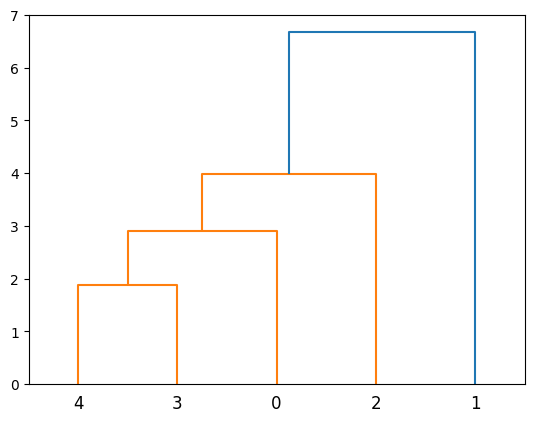

[[[[[array([6.3898675, 3.5441391]), array([4.97257355, 2.30834733])], array([8.32259168, 2.01922407])], array([7.95083435, 6.07255983])], array([1.58850324, 1.56261003])]]


In [94]:
C, link_matrix = clasterizing(arr)
dendrogram(link_matrix)
plt.show()
print(C)


In [3]:
np.inf?

In [6]:
dendrogram?